# HW 1

Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. The **objective** of this assignment is to help you familiarize w python packages related to machine learning, namely scikit-learn package.  

**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

## Instructions

This assignment covers several aspects of KNN Classifier and performence evaluation we have covered in [introML](https://git.txstate.edu/ML/2023Fall/tree/main/practice/introML) module. eep the following in mind:
* Structure your [notebook](https://git.txstate.edu/ML/2023Fall/blob/master/tutorials/notebook-checklist.md) cells as sugested
* **Q** - QUESTION posted in a markdown cell
   * it explains the task in details
   * it is marked with **Q1**, ... **Q10** ...  
* **A** - Marks the location where you need to enter your answer below
   * it can be ```python code``` (more often) or markdown cell (less often)
   * it is marked with **A1**, ... **A10** ... and you enter your answers **below**
   * make sure the cell is running and produces no errors 
* Before you submit the HW: 
  * Make sure your notebook can always be rerun from top to bottom.

* Follow instructions given in canvas for homework submission.


## Tutorials

* [KNN with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* [Plot Confursion Matrix with Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

# 1. CLASSIFICATION USING KNN ALGORITHM

**Data**  is in the ../data/ folder, and datafile name is [heart.dat](../data/heart.dat)
**Keep** the relative path from **HW** folder to **data** folder in your submission e.g. you will access the file as [../data/heart.dat](../data/heart.dat)


**Q1**
use pandas to read ../data/heart.dat
* NOTE : use separator as space while reading this data
* Use column names from metadata in given order
* NOTE : YOU WON'T SEE 'PRESENCE' in metadata (in attribute information)


**A1**
Replace the ? mark with your answer

In [33]:
import pandas as pd

columns = {'age','sex','chest pain type','resting blood pressure','serum cholestoral (mg/dl)',
           'fasting blood sugar (>120 mg/dl)','resting electrocardiographic results',
           'maximum heart rate achieved','exercise induced angina','oldpeak',
           'slope of peak exercise ST segment','number of major vessels','thal','presence'}

df = pd.read_csv('../data/heart.dat',header=None,delimiter=' ')

df.columns = columns

**Q2**
1. Have a look at head and tail of your data
* N.B: You can use .tail and .head methods
* N.B: Print both of them, if you just run ```without printing``` only output from last command will be printed
2. Let us view the size of dataset as well
* print data shape
3. Now let us see if there is some missing value
4. If there is any na values drop it

**N.B** You can add more cells as per your need.

**A2** Replace ??? with code in the code cell below

In [34]:
# Head
print(df.head())

   serum cholestoral (mg/dl)  exercise induced angina  thal  \
0                       70.0                      1.0   4.0   
1                       67.0                      0.0   3.0   
2                       57.0                      1.0   2.0   
3                       64.0                      1.0   4.0   
4                       74.0                      0.0   2.0   

   slope of peak exercise ST segment  chest pain type  resting blood pressure  \
0                              130.0            322.0                     0.0   
1                              115.0            564.0                     0.0   
2                              124.0            261.0                     0.0   
3                              128.0            263.0                     0.0   
4                              120.0            269.0                     0.0   

   maximum heart rate achieved  number of major vessels  sex  \
0                          2.0                    109.0  0.0   
1     

In [35]:
# Tail
print(df.tail())

     serum cholestoral (mg/dl)  exercise induced angina  thal  \
265                       52.0                      1.0   3.0   
266                       44.0                      1.0   2.0   
267                       56.0                      0.0   2.0   
268                       57.0                      1.0   4.0   
269                       67.0                      1.0   4.0   

     slope of peak exercise ST segment  chest pain type  \
265                              172.0            199.0   
266                              120.0            263.0   
267                              140.0            294.0   
268                              140.0            192.0   
269                              160.0            286.0   

     resting blood pressure  maximum heart rate achieved  \
265                     1.0                          0.0   
266                     0.0                          0.0   
267                     0.0                          2.0   
268           

In [36]:
# Shape
print(df.shape)

(270, 14)


In [37]:
# Find missing values
df.isnull()

,serum cholestoral (mg/dl),exercise induced angina,thal,slope of peak exercise ST segment,chest pain type,resting blood pressure,maximum heart rate achieved,number of major vessels,sex,fasting blood sugar (>120 mg/dl),oldpeak,resting electrocardiographic results,presence,age
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
# Drop missing values
df.dropna()

,serum cholestoral (mg/dl),exercise induced angina,thal,slope of peak exercise ST segment,chest pain type,resting blood pressure,maximum heart rate achieved,number of major vessels,sex,fasting blood sugar (>120 mg/dl),oldpeak,resting electrocardiographic results,presence,age
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


**Q3** Now we will look deeper into the dataset
* Use pairplot from sns to plot this data frame
* See the statistics of the data by describing dataframe

**A3** Replace ??? with code in the code cell below

<function matplotlib.pyplot.show(close=None, block=None)>

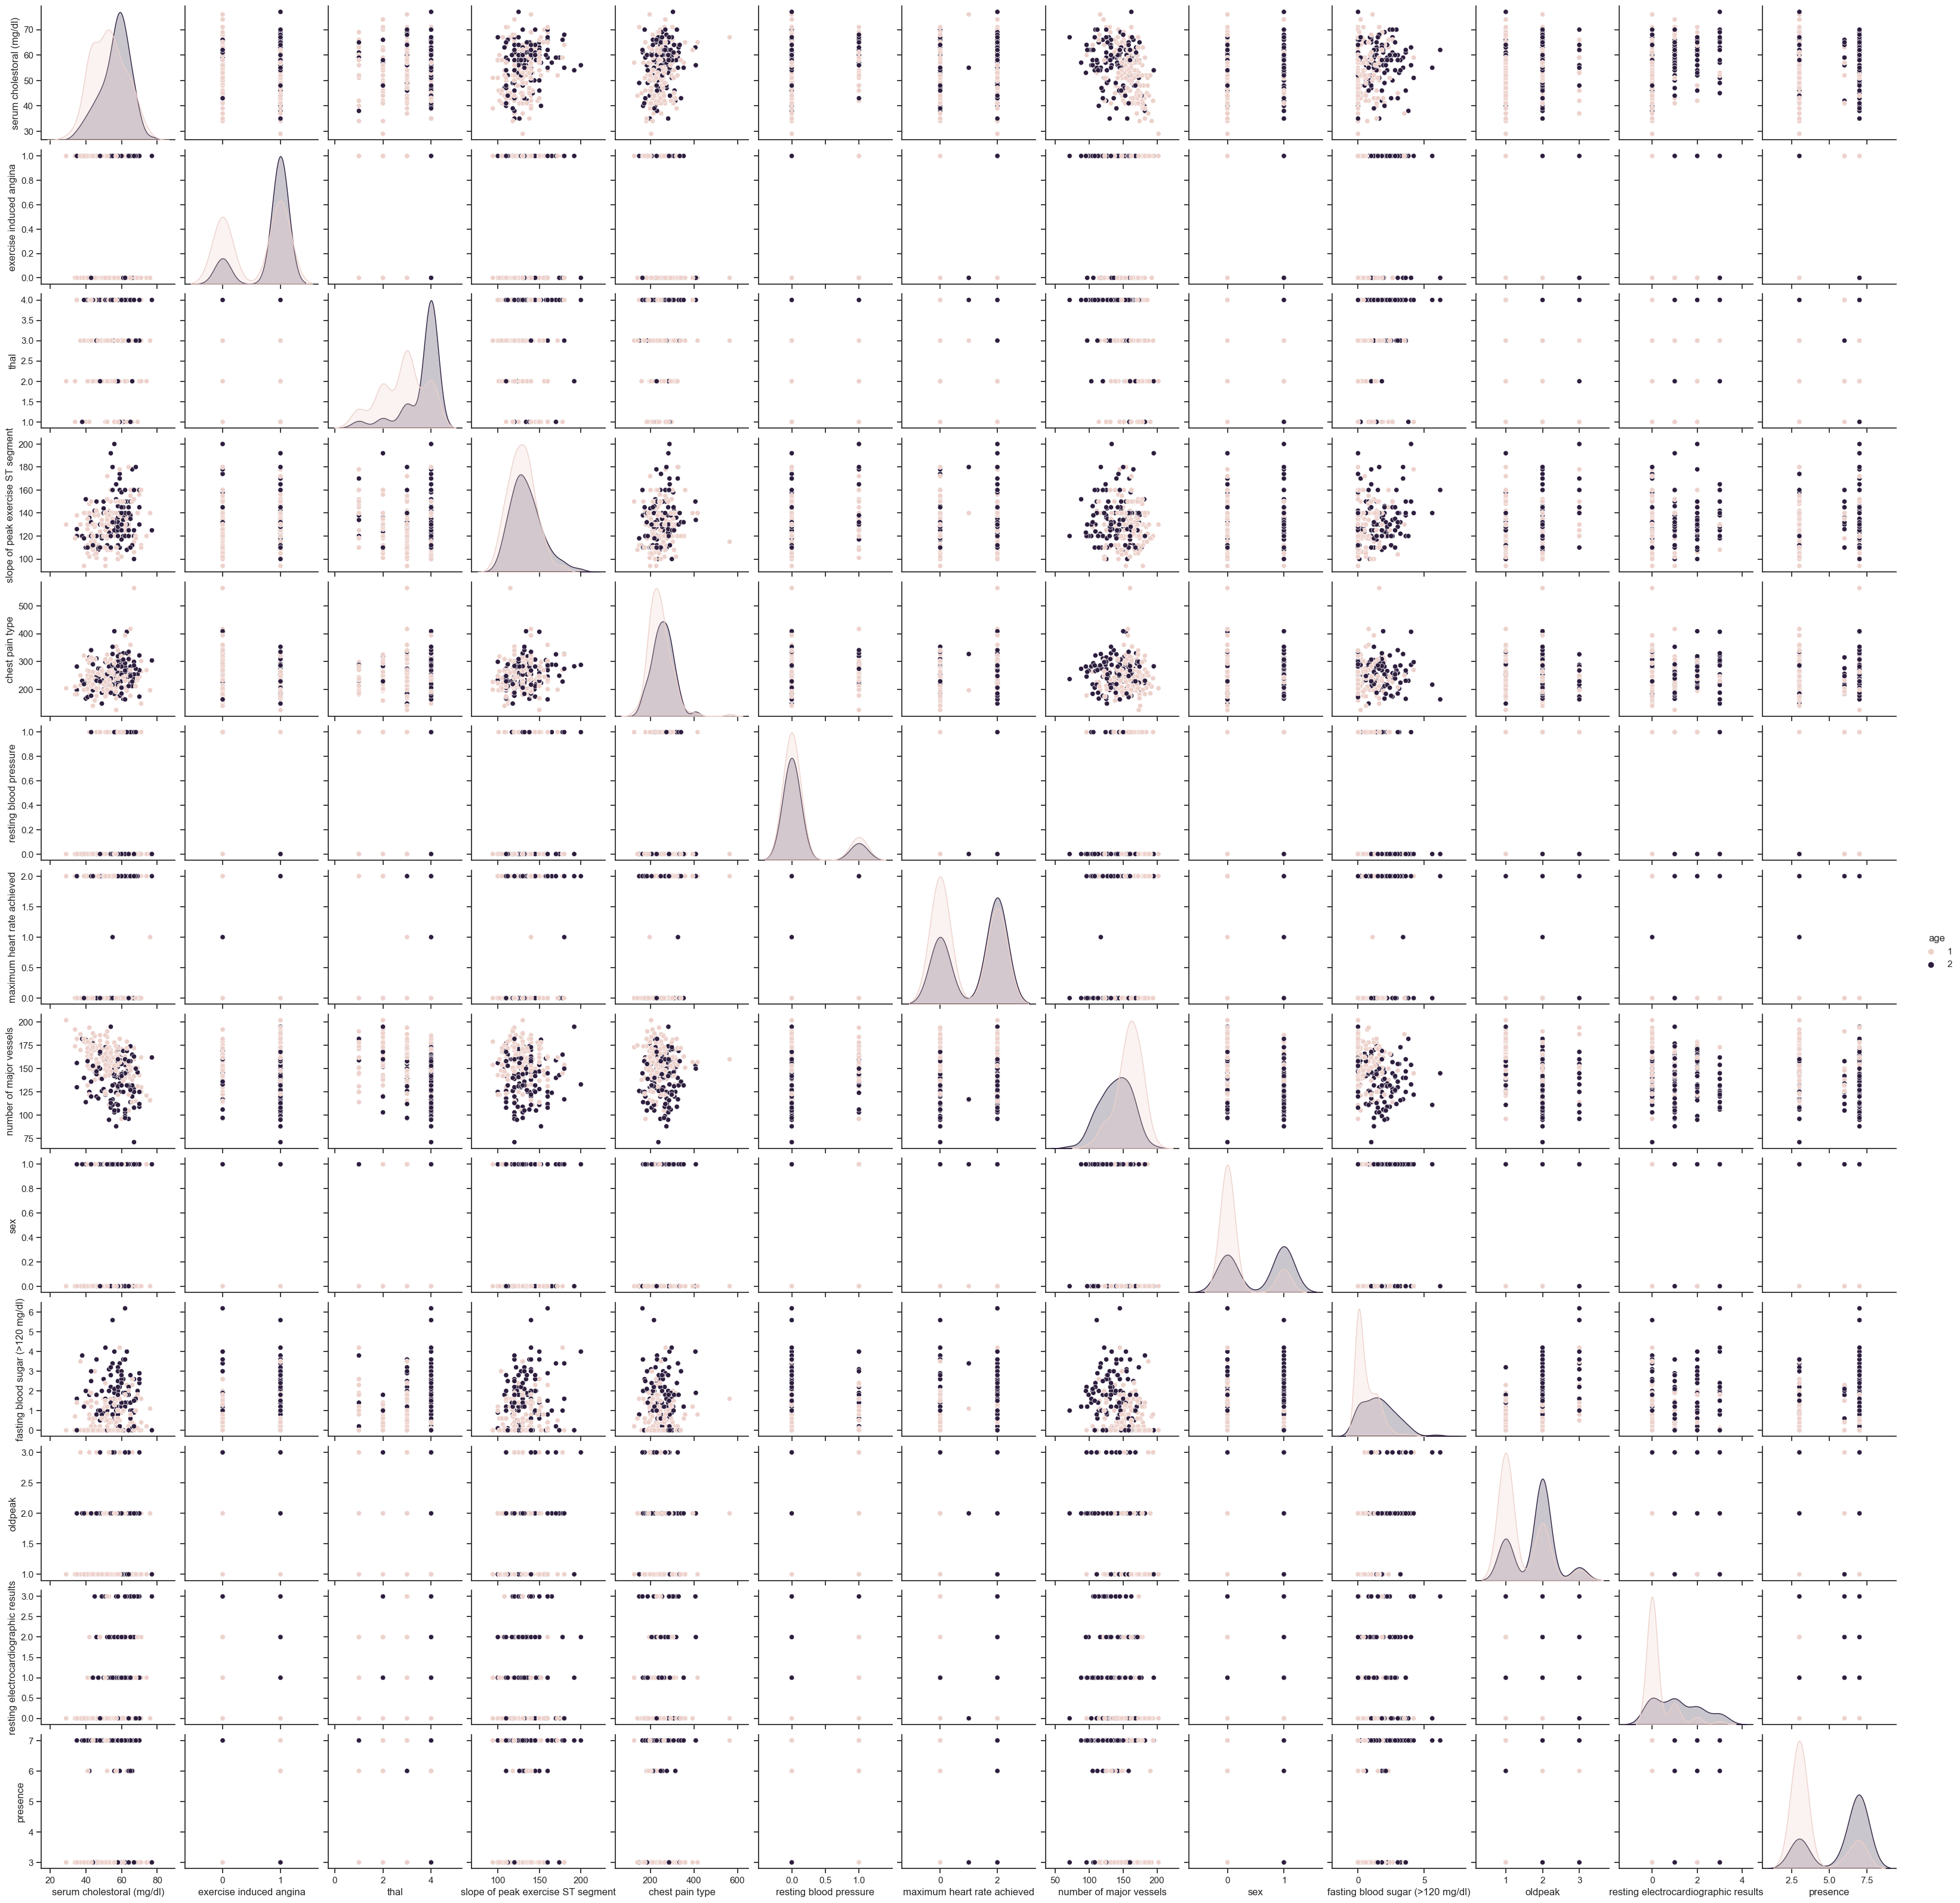

In [39]:
# Use pairplot from sns to plot dataframe
import seaborn as sns

sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='age')

import matplotlib.pyplot as plt
plt.show

In [40]:
#describe dataframe
df.describe()

,serum cholestoral (mg/dl),exercise induced angina,thal,slope of peak exercise ST segment,chest pain type,resting blood pressure,maximum heart rate achieved,number of major vessels,sex,fasting blood sugar (>120 mg/dl),oldpeak,resting electrocardiographic results,presence,age
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


**Q4** 

1. From the above pairplot what kind of relationship we can derive between age and heartrate?

**A4** Write your answer here......

**Q5** If you go through metadata (heart.doc) (Attribute Information:) you will see that all data in our dataframe are not of same types.
* So we should deal them accordingly.  
* We don't have to do anything to 'real' data. However we have to deal with ordered data and nominal data  
* We only need to convert all nominal and ordered data to dummy variables 

**A5** Replace ??? with code in the code cell below


In [41]:
dummy_list = ['slope of peak exercise ST segment','resting electrocardiographic results','chest pain type','thal']
df = pd.get_dummies(df, columns=dummy_list, prefix=dummy_list, prefix_sep='-')
df.head()

,serum cholestoral (mg/dl),exercise induced angina,resting blood pressure,maximum heart rate achieved,number of major vessels,sex,fasting blood sugar (>120 mg/dl),oldpeak,presence,age,...,chest pain type-360.0,chest pain type-394.0,chest pain type-407.0,chest pain type-409.0,chest pain type-417.0,chest pain type-564.0,thal-1.0,thal-2.0,thal-3.0,thal-4.0
0,70.0,1.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,2,...,0,0,0,0,0,0,0,0,0,1
1,67.0,0.0,0.0,2.0,160.0,0.0,1.6,2.0,7.0,1,...,0,0,0,0,0,1,0,0,1,0
2,57.0,1.0,0.0,0.0,141.0,0.0,0.3,1.0,7.0,2,...,0,0,0,0,0,0,0,1,0,0
3,64.0,1.0,0.0,0.0,105.0,1.0,0.2,2.0,7.0,1,...,0,0,0,0,0,0,0,0,0,1
4,74.0,0.0,0.0,2.0,121.0,1.0,0.2,1.0,3.0,1,...,0,0,0,0,0,0,0,1,0,0


## KNN Model from sklearn

**Q6** Get training data from the dataframe
1. Assign values of ```presence``` column to y, note you have to use .values method
2. Drop 'presence' column from data frame,
3. Assign df values to x

Split dataset into train and test data use train_test_split
1. Use stratify = y and test_size = 0.25 and random_state = 123
2. Create a KNN model using sklearn library, ```Initialize n_neighbors = 4```, ```(See the documenttaion for details)```
3. Fit the model with the train data 

**A6** Replace ??? with code in the code cell below

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Assign values of ```presence``` column to y, note you have to use .values method
y = df['presence'].values
# Drop 'presence' column from data frame,
# df.
# Assign df values to x
x = df.drop(['presence'], axis=1).values
# View shape of x and y
print(x.shape)
print(y.shape)

# Use stratify = y and test_size = 0.25 and random_state = 123

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=123, stratify=y)

# Create a KNN model using sklearn library, k=4 
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the model with the train data
knn.fit(xtrain, ytrain)

(270, 208)
(270,)


KNeighborsClassifier(n_neighbors=4)

**Q7** 
_Analysis_
* Predict xtest and view first 20 predicitons
* Compare prediction with real ytest 20 predictions
* Print the score with test data

The way we fit the dataset is not good  
_Normalization_
* rescale only real value columns
* For each column normalize ```df[col] as (x - mean) / standard_deviation```

**A7** Replace ??? with code in the code cell below

In [43]:
#  Predict xtest and view first 25 predicitons
print(knn.predict(xtest)[:25])

# Compare prediction with real ytest 25 predictions
print(ytest[:25])

# Print the score with test data
print(knn.score(xtest, ytest))

#rescale only real value columns
realcols = ['age','resting blood pressure','serum cholestoral (mg/dl)','maximum heart rate achieved','oldpeak','number of major vessels']

# For each column normalize ```df[col] as (x - mean) / standard_deviation```
for col in realcols:
  mean = df[col].mean()
  std = df[col].std()
  df[col] = (x-mean)/std

[3. 3. 3. 3. 7. 7. 3. 3. 3. 3. 7. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 7. 7.
 7.]
[3. 3. 7. 6. 7. 6. 3. 7. 3. 3. 7. 3. 3. 3. 3. 3. 7. 7. 7. 7. 7. 3. 6. 7.
 3.]
0.5588235294117647


**Q8** Write the code to train new model using KNN classifier, k=4 (same as above)

**A8** Replace ??? with code in the code cell below

In [44]:
# update x
x = df.drop(['presence'], axis=1).values

# Train test Split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=123, stratify=y)

# Model Initialization
knn = KNeighborsClassifier(n_neighbors=4)

# Model fitting with training data
knn.fit(xtrain, ytrain)

# Now print score on test data
knn.score(xtest, ytest)

0.5294117647058824

**Q9** Lets analyze the difference between two modeling strategies (data normalization)  Compare score with and without data normalization process and explain

**A9**  
I got a lower score after normalizing the data and I'm not sure why.

**Q10** Now we will write a function that will initialize, fit and return score on test data for given values of k and Plot result  

1. Use values from 1 to 25(inclusive) and get score and plot as a line graph
* Hint : For advance method you can use map (recall functional programming from last exercise) or you can use simple loops

2. Finally you can print the best value of k by getting the index   
* N.B: Note index starts with 0 but values of k starts with 1 so actual value of k will be 1 more  
* You can use ```np.argmax()``` function  

3. Now define your best model as bestknn and print score

**A10** Write the code below (replace??)

[0.5147058823529411, 0.5441176470588235, 0.5294117647058824, 0.5294117647058824, 0.5147058823529411, 0.5, 0.5441176470588235, 0.4852941176470588, 0.5441176470588235, 0.5294117647058824, 0.5294117647058824, 0.5735294117647058, 0.5882352941176471, 0.5588235294117647, 0.5735294117647058, 0.5735294117647058, 0.5735294117647058, 0.6029411764705882, 0.6029411764705882, 0.5882352941176471, 0.5588235294117647, 0.5441176470588235, 0.5735294117647058, 0.5441176470588235, 0.5441176470588235]
BEST VALUE OF K 18
[[29  1  8]
 [ 3  0  1]
 [18  1  7]]


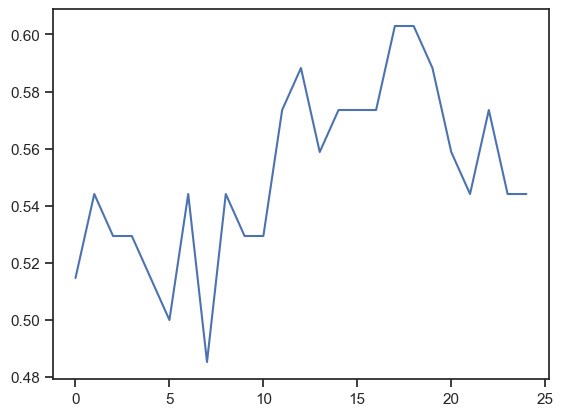

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def returnScore(k, xtrain, xtest, ytrain, ytest):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain, ytrain)
  return knn.score(xtest, ytest)


result = [*map(lambda i:returnScore(i,xtrain, xtest, ytrain, ytest), range(1,26))]
print(result)
plt.plot(result)


print('BEST VALUE OF K',np.argmax(result) + 1 )


bestknn = KNeighborsClassifier(n_neighbors=4)

bestknn.fit(xtrain,ytrain)
bestknn.score(xtest,ytest)


ypred = bestknn.predict(xtest)
matrix = confusion_matrix(ytest, ypred)
print(matrix)

**Q11** Now plot confusion matrix using [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), for xtest data. Use the Best KNN model from the above question as the estimator. See [Visualization with Display Objects](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html) example. 

**A11** Replace ??? with code in the code cell below

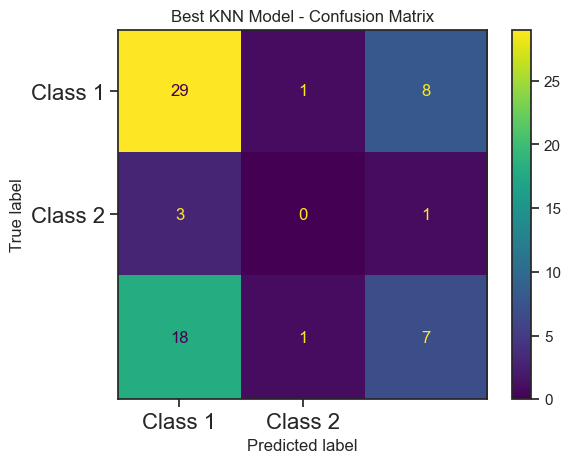

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(bestknn, xtest, ytest)

plt.title("Best KNN Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()

**Q12:** 
1. Calculate the test MSE 
2. Get the score from the model using test data
3. Plot Precision-Recall Curve from the true & predicted test data

**A12** Replace ??? with code in the code cell below

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

mse = mean_squared_error(ytest, ypred)          # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))

print(bestknn.score(xtest,ytest))

# I kept getting the error message (Expected 'estimator' to be a binary classifier. Got 3 classes instead.)
# with the below entry and wasn't sure why

# PrecisionRecallDisplay.from_estimator(bestknn, xtest, ytest)
# plt.show()

Test mean squared error (MSE): 6.68
0.5294117647058824


## Further reading

* [KNN model creation](https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a)
* [Example of KNN](https://github.com/a-martyn/ISL-python/blob/master/Notebooks/ch4_classification_applied.ipynb)